In [47]:
# 참고

# https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning
# https://yganalyst.github.io/data_handling/Pd_11/
# https://haloaround.tistory.com/260
# https://stml.tistory.com/25
# https://riptutorial.com/ko/pandas/example/5621/dataframe%EC%9D%98-%EC%97%B4-%EC%82%AD%EC%A0%9C
# https://kanoki.org/2019/03/23/pandas-rename-and-reorder-columns/
# https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
# https://m.blog.naver.com/PostList.nhn?blogId=youji4ever
# https://m.blog.naver.com/youji4ever/221712578078

In [48]:
# df 가져오기

import numpy as np
import pandas as pd
naver = pd.read_csv('./data/naver.csv')
bluer = pd.read_csv('./data/bluer.csv')
mango = pd.read_csv('./data/mango.csv')
dining = pd.read_csv('./data/dining.csv')
menu = pd.read_csv('./data/menu.csv')

In [49]:
# 컬럼명 전처리

# drop

naver = naver.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'reviewcount'], axis=1)
bluer = bluer.drop(['Unnamed: 0', 'station'], axis=1)
mango = mango.drop(['review_count'], axis=1)
dining = dining.drop(['Unnamed: 0', 'star', 'zzim'], axis=1)
menu = menu.drop('link', axis=1)

# 통합

naver = naver.rename({'name':'fname','rating':'rating','thumbnail':'img'}, axis=1)
bluer = bluer.rename({'name':'fname','ribbonType':'rating'}, axis=1)
mango = mango.rename({'name':'fname','cusine_code':'category', 'rating':'rating', 'thumbnail':'img'}, axis=1)
dining = dining.rename({'name':'fname','address':'addr', 'score':'rating'}, axis=1)
menu = menu.rename({'name':'fname','address':'addr', 'rating':'rating', 'rest_type':'category'}, axis=1)

# name 컬럼 생성

naver_ed = naver['fname'].str.split(' ', expand=True)
bluer_ed = bluer['fname'].str.split(' ', expand=True)
mango_ed = mango['fname'].str.split(' ', expand=True)
dining_ed = dining['fname'].str.split(' ', expand=True)
menu_ed = menu['fname'].str.split(' ', expand=True)

naver['name'] = naver_ed[0]
bluer['name'] = bluer_ed[0]
mango['name'] = mango_ed[0]
dining['name'] = dining_ed[0]
menu['name'] = menu_ed[0]

# dong 컬럼 생성

naver['dong'] = naver['addr'].str.split(' ', expand=True)[2]
bluer['dong'] = bluer['addr'].str.split(' ', expand=True)[2]
mango['dong'] = mango['addr'].str.split(' ', expand=True)[2]
dining['dong'] = dining['addr'].str.split(' ', expand=True)[2]
menu['dong'] = menu['addr'].str.split(' ', expand=True)[2]

# prefix 추가

naver = naver.add_prefix('n_')
bluer = bluer.add_prefix('b_')
mango = mango.add_prefix('mg_')
dining = dining.add_prefix('d_')
menu = menu.add_prefix('mn_')

print()

In [50]:
# 중복값 제거

# by id

naver = naver.drop_duplicates(['n_id'])
bluer = bluer.drop_duplicates(['b_id'])
dining = dining.drop_duplicates(['d_id'])

# by [name, tel, dong]

naver.drop_duplicates(subset=['n_name', 'n_tel', 'n_dong'], keep='first')
bluer.drop_duplicates(subset=['b_name', 'b_tel', 'b_dong'], keep='first')
mango.drop_duplicates(subset=['mg_name', 'mg_tel', 'mg_dong'], keep='first')
dining.drop_duplicates(subset=['d_name', 'd_tel', 'd_dong'], keep='first')
menu.drop_duplicates(subset=['mn_name', 'mn_tel', 'mn_dong'], keep='first')

print()

In [51]:
# df merge

naver['key'] = naver['n_name'] + naver['n_dong']
bluer['key'] = bluer['b_name'] + bluer['b_dong']
mango['key'] = mango['mg_name'] + mango['mg_dong']
dining['key'] = dining['d_name'] + dining['d_dong']
menu['key'] = menu['mn_name'] + menu['mn_dong']

nb = naver.merge(bluer, how='inner', on='key')
nmg = naver.merge(mango, how='inner', on='key')
nd = naver.merge(dining, how='inner', on='key')
nmn = naver.merge(menu, how='inner', on='key')

nb = nb[['b_rating', 'b_priceRange', 'key']]
nmg = nmg[['mg_rating', 'key']]
nd = nd[['d_rating', 'key']]
nmn = nmn[['mn_rating', 'key']]

df = naver.merge(nb, how='outer', on='key')
df = df.merge(nmg, how='outer', on='key')
df = df.merge(nd, how='outer', on='key')
df = df.merge(nmn, how='outer', on='key')

In [52]:
# df 전처리

df.columns
df[['n_fname', 'n_tel', 'n_addr', 'n_bizhour',
       'n_category', 'n_context', 'n_menu', 'n_microreview', 'n_img', 'n_lng',
       'n_lat', 'n_rating', 'n_name', 'b_rating', 'b_priceRange',
       'mg_rating', 'd_rating', 'mn_rating']]
df.rename(columns=lambda x: x.replace('n_', ''), inplace=True)
df = df[['fname', 'name', 'tel', 'addr', 'bizhour', 'category', 'menu',
    'context', 'microreview', 'img', 'lng', 'lat',
    'rating', 'b_rating', 'mg_rating', 'd_rating', 'mrating']]
df = df.rename({'b_priceRange':'priceRange', 'rating':'n_rating', 'mrating':'mn_rating'}, axis=1)

print()

In [53]:
# si, gu, dong 컬럼 채우기

edit = df['addr'].str.split(' ', expand=True)
df['si'] = edit[0]
df['gu'] = edit[1]
df['dong'] = edit[2]

# si, dong, gu 전처리

seoul = df.si.str.startswith('서울', na=False)
df = df[seoul]
df['si'] = '서울특별시'
# list(df['dong'].unique())

import warnings
warnings.filterwarnings('ignore')

In [54]:
# category 전처리

# 1: 한식, 2: 중식, 3: 일식, 4: 양식, 5: 동남아, 6: 뷔페, 7: 카페/디저트, 8: 바

df.category[df.category==1] = '한식'
df.category[df.category==2] = '중식'
df.category[df.category==3] = '일식'
df.category[df.category==4] = '양식'
df.category[df.category==5] = '동남아'
df.category[df.category==6] = '뷔페'
df.category[df.category==7] = '디저트'
df.category[df.category==8] = '바'

df.category[df.loc[:, 'category'].str.contains('한식', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('중식', na=False)] = '중식'
df.category[df.loc[:, 'category'].str.contains('일식', na=False)] = '일식'
df.category[df.loc[:, 'category'].str.contains('양식', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('동남아', na=False)] = '동남아식'
df.category[df.loc[:, 'category'].str.contains('뷔페', na=False)] = '뷔페'
df.category[df.loc[:, 'category'].str.contains('디저트', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('바', na=False)] = '바'

df.category[df.loc[:, 'category'].str.contains('이탈리아', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('프랑스', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('패밀리', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('브런치', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('미국', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('유럽', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('스페인', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('술', na=False)] = '바'
df.category[df.loc[:, 'category'].str.contains('컵밥', na=False)] = '분식'
df.category[df.loc[:, 'category'].str.contains('테마', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('베이커리', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('남미', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('퓨전', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('아시아', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('인도', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('기타', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('육류', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('베트남', na=False)] = '동남아식'
df.category[df.loc[:, 'category'].str.contains('해물', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('죽', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('양갈비', na=False)] = '중식'
df.category[df.loc[:, 'category'].str.contains('햄버거', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('샌드위치', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('치킨', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('돈가스', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('주점', na=False)] = '바'
df.category[df.loc[:, 'category'].str.contains('카페', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('피자', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('분식', na=False)] = '분식'
df.category[df.loc[:, 'category'].str.contains('스테이크', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('태국', na=False)] = '동남아식'
df.category[df.loc[:, 'category'].str.contains('아프리카', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('터키', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('생활', na=False)] = '디저트'
df.category[df.loc[:, 'category'].str.contains('아경면선', na=False)] = '중식'
df.category[df.loc[:, 'category'].str.contains('곱창', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('정육점', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('주꾸미', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('찌개', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('후렌치후라이', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('닭갈비', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('게요리', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('킹크랩요리', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('푸드코트', na=False)] = '기타'
df.category[df.loc[:, 'category'].str.contains('핫도그', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('컨템퍼러리', na=False)] = '양식'
df.category[df.loc[:, 'category'].str.contains('돼지', na=False)] = '한식'
df.category[df.loc[:, 'category'].str.contains('음식점', na=False)] = '한식'

# df 전처리

df = df[['fname', 'name', 'tel', 'addr', 'si', 'gu', 'dong', 'bizhour', 'category', 'menu',
       'context', 'microreview', 'img', 'lat', 'lng', 'n_rating', 'b_rating',
       'mg_rating', 'd_rating', 'mn_rating']]

In [55]:
df.d_rating.unique()

array([nan, '63점', '66점', '52점', '69점', '19점', '73점', '25점', '85점', '68점',
       '34점', '55점', '31점', '56점', '53점', '61점', '72점', '57점', '70점',
       '77점', '59점', '54점', '26점', '51점', '14점', '35점', '74점', '30점',
       '60점', '42점', '38점', '47점', '67점', '79점', '41점', '50점', '20점',
       '64점', '43점', '82점', '62점', '65점', '76점', '18점', '48점', '58점',
       '28점', '36점', '22점', '45점', '13점', '37점', '49점', '40점', '75점',
       '27점', '32점', '81점', '44점', '46점', '100점', '71점', '78점', '33점',
       '29점', '89점', '86점', '39점', '12점', '23점', '87점', '24점', '21점',
       '80점', '15점', '17점', '16점', '10점', '11점', '90점', '83점'],
      dtype=object)

In [57]:
# rating 전처리

# naver 점수 변환

df[df.n_rating == 'FALSE'] = np.nan

# bluer 점수 변환

df.b_rating[df.b_rating == 'RIBBON_THREE'] = 5.
df.b_rating[df.b_rating == 'RIBBON_TWO'] = 4.5
df.b_rating[df.b_rating == 'RIBBON_ONE'] = 4.
df.b_rating[df.b_rating == 'ATTENTION'] = 3.5
df.b_rating[df.b_rating == 'NEW'] = 3.
df.b_rating[df.b_rating == 'NOT'] = 3.

# dining 점수 변환

df.d_rating = df.d_rating.str.replace('점', '')
df = df.astype({'n_rating':float, 'b_rating':float, 'd_rating':float})
df.d_rating = df.d_rating / 20.

# rating 결측값 채우기(mean)

df = df.fillna({'n_rating':df.n_rating.mean(),
              'b_rating':df.b_rating.mean(),
              'mg_rating':df.mg_rating.mean(),
              'd_rating':df.d_rating.mean(),
              'mn_rating':df.mn_rating.mean()})

# category 결측값 채우기('기타')

df['category'] = df['category'].fillna('기타')

# rating 반올림(소수점 둘째자리)
df.n_rating = df.n_rating.round(2)
df.b_rating = df.b_rating.round(2)
df.mg_rating = df.mg_rating.round(2)
df.d_rating = df.d_rating.round(2)
df.mn_rating = df.mn_rating.round(2)

# rating 통합
df['rating'] = (df.n_rating*.5) + (df.b_rating*.175) + (df.mg_rating*.25) + (df.d_rating*.075) + (df.mn_rating*0.01)
df.rating = df.rating.round(2)

# df.dtypes

In [58]:
df

,fname,name,tel,addr,si,gu,dong,bizhour,category,menu,...,microreview,img,lat,lng,n_rating,b_rating,mg_rating,d_rating,mn_rating,rating
0,박순례 손말이고기 산정집 광화문점,박순례,02-310-9636,서울특별시 종로구 당주동 3-2 선덕빌딩 2층,서울특별시,종로구,당주동,일요일 휴무 명절연휴 휴무 | 매일 11:30~14:00 점심 | 매일 14:00~...,한식,"한우말이고기 21,000 | 한우내장볶음 21,000 | 한우내장전골 25,000 ...",...,[],https://ldb-phinf.pstatic.net/20200930_73/1601...,37.572380,126.974200,4.41,3.53,4.00,2.13,3.83,4.02
1,한옥 달,한옥,010-8706-3392,서울특별시 종로구 체부동 68,서울특별시,종로구,체부동,평일 11:30~22:00 (L.O. 20:30) | 평일 15:30~17:00 B...,양식,"단호박 크림 스프 15,000 | 아보카도 허머스 16,000 | 리코타 치즈 샐러...",...,[],https://ldb-phinf.pstatic.net/20190808_53/1565...,37.576946,126.971983,4.32,3.53,3.94,2.13,3.83,3.96
2,할매집,할매집,02-735-2608,서울특별시 종로구 내자동 108,서울특별시,종로구,내자동,매일 12:00~21:30,한식,"족발 30,000 | 감자탕(중) 25,000 | 감자탕(대) 30,000",...,"['콩나물 넣은 감자탕', '구수하고 푸짐한 감자탕을 먹을 수 있는 식신로드 맛집'...",http://blogfiles.naver.net/20150910_18/xxxyeji...,37.575660,126.971475,4.30,3.53,3.50,3.15,3.90,3.92
3,디퍼카페테리아,디퍼카페테리아,010-9160-4482,서울특별시 종로구 체부동 2-2,서울특별시,종로구,체부동,주말 12:00~19:30 | 수요일 12:00~19:30 | 목요일 12:00~1...,디저트,"아메리카노 3,500 | 카페라떼 4,000 | 그라니따 5,500 | 스폴리아텔라...",...,[],https://ldb-phinf.pstatic.net/20200908_251/159...,37.579038,126.970393,4.48,3.53,3.94,2.13,3.83,4.04
4,후라토식당 경복궁 본점,후라토식당,02-730-7090,서울특별시 종로구 당주동 5,서울특별시,종로구,당주동,매일 11:30~22:00 평일 브레이크타임 15:00-17:00,일식,"규카츠 15,000 | 반숙 오므라이스 11,000 | 야마가타 민치카레 12,00...",...,[],https://ldb-phinf.pstatic.net/20200804_260/159...,37.572032,126.974311,4.67,3.53,4.10,2.13,3.83,4.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11020,반피셋,반피셋,010-5448-9476,서울특별시 강동구 길동 366-1,서울특별시,강동구,길동,"매일 11:30~21:30 Break Time 15:00~17:00 매주 일요일,월...",동남아식,"꾸웨이띠여우 느아 뚠 9,000 | 똠얌 꾸웨이띠여우 10,000 | 꾸웨이띠여우 ...",...,[],https://ldb-phinf.pstatic.net/20191109_241/157...,37.539458,127.141008,4.61,3.53,3.94,1.10,3.83,4.03
11021,도니도리곱창 길동점,도니도리곱창,02-484-9991,서울특별시 강동구 길동 390-23,서울특별시,강동구,길동,매일 17:00~02:00 | 일요일 17:00~12:00 | 월요일 휴무,한식,"막창소금구이 12,000 | 막창양념구이 12,000 | 야채곱창 11,000 | ...",...,[],https://ldb-phinf.pstatic.net/20190401_231/155...,37.537137,127.140432,4.46,3.53,3.94,2.13,3.83,4.03
11022,동남집,동남집,02-477-0590,서울특별시 강동구 길동 458-3,서울특별시,강동구,길동,매일 00:00~24:00 월요일 오전 10시 오픈/일요일 오후10시 마감,한식,"양지곰탕 8,000 | 특곰탕 10,000 | 도가니탕 13,000 | 옛날불고기(...",...,[],https://ldb-phinf.pstatic.net/20191225_218/157...,37.535022,127.138280,4.27,3.53,3.94,2.13,3.83,3.94
11023,라무진 길동점,라무진,02-6397-7299,서울특별시 강동구 길동 414-10,서울특별시,강동구,길동,"매일 17:00~24:00 일요일 정기휴무, 라스트오더 마감1시간전",중식,"양갈비 27,000",...,[],http://ldb.phinf.naver.net/20190412_142/155506...,37.536099,127.137484,4.40,3.53,3.94,1.50,3.83,3.95


In [59]:
df.describe()

,lat,lng,n_rating,b_rating,mg_rating,d_rating,mn_rating,rating
count,10416.000000,10416.000000,10922.000000,10922.000000,10922.000000,10922.000000,10922.000000,10922.000000
mean,37.553526,126.995351,4.414122,3.529803,3.939149,2.130149,3.829996,4.008786
std,0.043735,0.080302,0.176846,0.189512,0.323004,0.467388,0.021737,0.131972
min,37.435004,126.802395,2.960000,3.000000,0.000000,0.500000,3.100000,2.740000
25%,37.521574,126.929882,4.310000,3.530000,3.940000,2.130000,3.830000,3.950000
50%,37.555113,127.003025,4.410000,3.530000,3.940000,2.130000,3.830000,4.010000
75%,37.580144,127.052928,4.520000,3.530000,3.940000,2.130000,3.830000,4.070000
max,37.691130,127.179336,5.000000,5.000000,4.800000,5.000000,4.700000,4.660000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10922 entries, 0 to 11024
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fname        10416 non-null  object 
 1   name         10416 non-null  object 
 2   tel          10344 non-null  object 
 3   addr         10416 non-null  object 
 4   si           10416 non-null  object 
 5   gu           10416 non-null  object 
 6   dong         10416 non-null  object 
 7   bizhour      10114 non-null  object 
 8   category     10922 non-null  object 
 9   menu         10332 non-null  object 
 10  context      10416 non-null  object 
 11  microreview  10416 non-null  object 
 12  img          10218 non-null  object 
 13  lat          10416 non-null  float64
 14  lng          10416 non-null  float64
 15  n_rating     10922 non-null  float64
 16  b_rating     10922 non-null  float64
 17  mg_rating    10922 non-null  float64
 18  d_rating     10922 non-null  float64
 19  mn_r

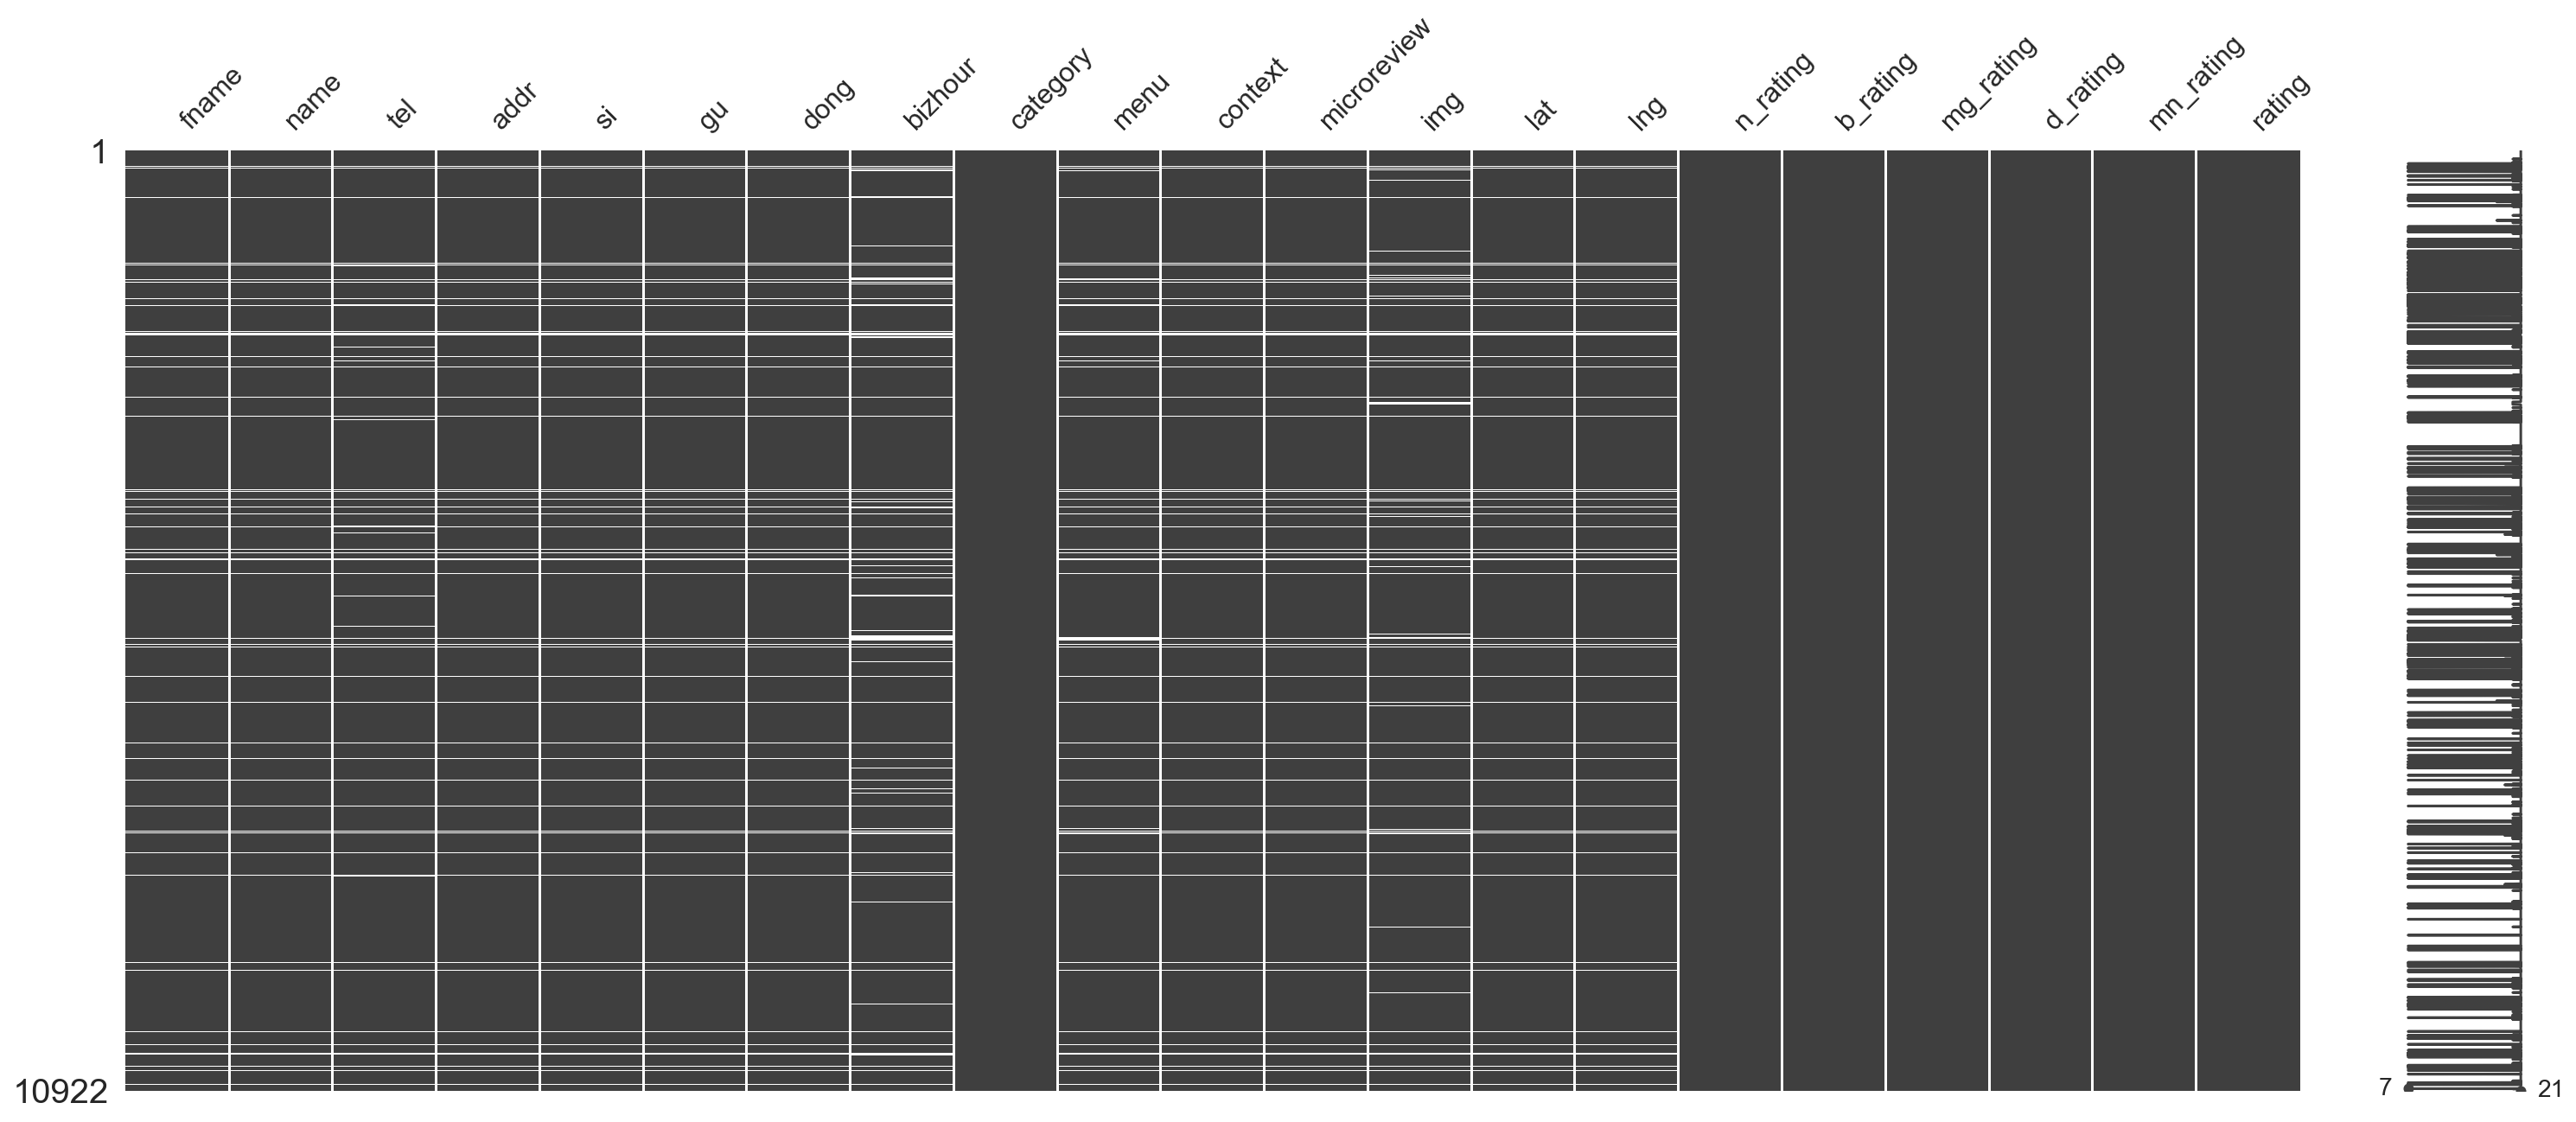

In [61]:
# msno 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.heatmap(df.isnull(), cbar=False)
import missingno as msno
# msno.bar(df)
msno.matrix(df)

In [62]:
df.to_csv('./df.csv')

In [65]:
df.to_excel('./df.xlsx')

In [63]:
# df[df.loc[:, 'menu'].str.contains('삼계탕', na=False)]
# A =input("djfak:")